# Linear Regression



## Univariate Linear Regression



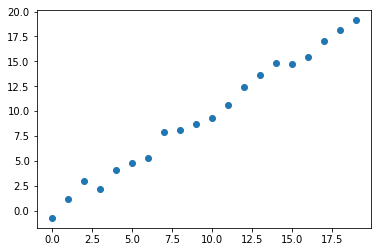

In [22]:
import numpy as np
def generate_linear_data(a, b, N):
    """generate data"""
    x = np.arange(0,N)
    # linear data with uniform error
    y = a*x + b + (2 * np.random.random((N)) -1)
    return x, y

x, y = generate_linear_data(1, 0, 20)
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [23]:
# our hypothesis
def hypothesis(a, b):
    """In this case, our hypothesis is a line"""
    return lambda x: a*x + b

def cost(a, b, x, y):
    # Squared error function 
    # Mean squared error
    N = len(x)
    h = hypothesis(a, b)
    # half, because good for gradient descent (derivative cancel out)
    return 1/(2*N) * np.sum(np.square(h(x)-y))

def cost_derivative_b(a,b, x, y):
    N = len(x)
    h = hypothesis(a, b)
    return 1/N * np.sum(h(x)-y)

def cost_derivative_a(a,b, x, y):
    N = len(x)
    h = hypothesis(a, b)
    return 1/N * np.sum((h(x)-y)*x)

In [48]:
# find parameters that minimize the cost function: Gradient Descent

def gradient_descent(x, y, alpha=0.05, num_steps=1000):
    """Given data, return two parameters, a and b, for the best fit"""
    a, b = np.random.random((2))
    
    for i in range(num_steps):
        c = cost(a, b, x, y)
        new_a = a - alpha * cost_derivative_a(a, b, x, y)
        new_b = b - alpha * cost_derivative_b(a, b, x, y)
        if i%1000==0: print("Iteration: ", i, "cost: ", c, new_a, new_a)
        a = new_a
        b = new_b
    return a, b

In [49]:
a, b = gradient_descent(x,y, alpha=0.005, num_steps=10000)
print(a, b)



Iteration:  0 cost:  5.705370523489428 0.8248154058257321 0.8248154058257321
Iteration:  1000 cost:  0.15881391464767225 0.9924835912718857 0.9924835912718857
Iteration:  2000 cost:  0.1504326637550376 1.00717230831587 1.00717230831587
Iteration:  3000 cost:  0.14985700005775235 1.0110218928910448 1.0110218928910448
Iteration:  4000 cost:  0.1498174607698088 1.0120307830042554 1.0120307830042554
Iteration:  5000 cost:  0.1498147450257059 1.012295190563216 1.012295190563216


Iteration:  6000 cost:  0.14981455849563893 1.0123644858772645 1.0123644858772645
Iteration:  7000 cost:  0.14981454568387728 1.0123826466309434 1.0123826466309434
Iteration:  8000 cost:  0.14981454480390533 1.0123874061587514 1.0123874061587514
Iteration:  9000 cost:  0.1498145447434648 1.012388653524657 1.012388653524657
1.012388980275814 -0.1277887859154025


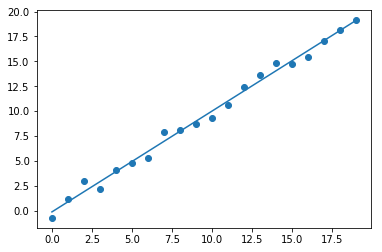

In [51]:
x_arr = np.arange(len(x))
y_arr = hypothesis(a, b)(x_arr)

plt.scatter(x, y)
plt.plot(x_arr, y_arr)
plt.show()